In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import classification_report #for cross validation

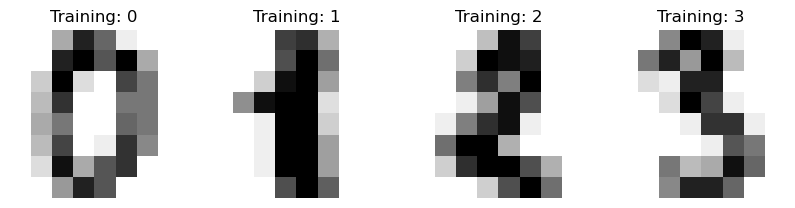

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [70]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(kernel = "linear", C = 1)
data, target = digits.data, digits.target


In [152]:

# Split the data with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    digits.target, 
    test_size=0.5, 
    random_state=365
)

In [120]:
# Learn the digits on the train subset
clf.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [122]:
# Predict the value of the digit on the test subset
y_pred=clf.predict(X_test)

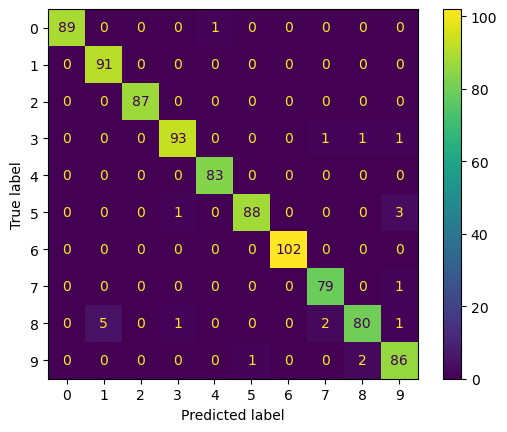

In [124]:
#print confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [126]:
#print classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        90
           1       0.95      1.00      0.97        91
           2       1.00      1.00      1.00        87
           3       0.98      0.97      0.97        96
           4       0.99      1.00      0.99        83
           5       0.99      0.96      0.97        92
           6       1.00      1.00      1.00       102
           7       0.96      0.99      0.98        80
           8       0.96      0.90      0.93        89
           9       0.93      0.97      0.95        89

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



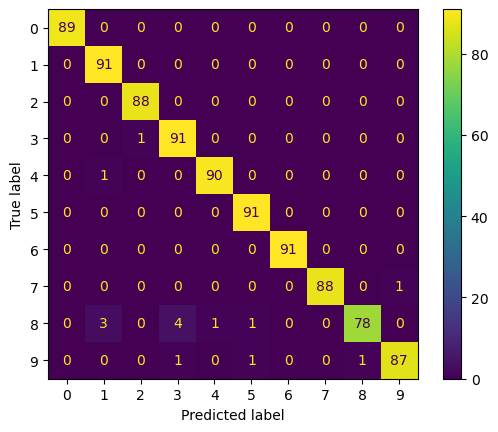

In [156]:

# Split the data with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    digits.target, 
    stratify=digits.target, 
    test_size=0.5, 
    random_state=365
)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [130]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.96      1.00      0.98        91
           2       0.99      1.00      0.99        88
           3       0.95      0.99      0.97        92
           4       0.99      0.99      0.99        91
           5       0.98      1.00      0.99        91
           6       1.00      1.00      1.00        91
           7       1.00      0.99      0.99        89
           8       0.99      0.90      0.94        87
           9       0.99      0.97      0.98        90

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



## Optimizing hyperparameters with SearchGridCV

In [132]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [134]:
scores = ["precision", "recall"]

In [158]:
for score in scores:
    grid_search = GridSearchCV(
        clf, tuned_parameters, scoring="%s_macro" % score
    )
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [162]:
#Create and test new classifier
y_pred=grid_search.predict(X_test)


In [164]:
# Learn the digits on the train subset
print("Best parameters found:", grid_search.best_params_)
print("Best precision score:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best recall score:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

Best parameters found: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


KeyError: 'mean_test_precision'

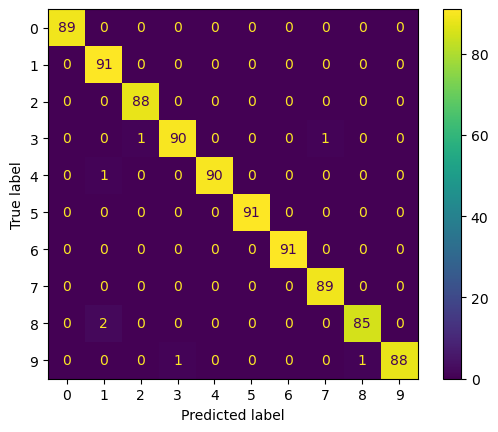

In [166]:
# Predict the value of the digit on the test subset
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [176]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.95      1.00      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [15]:
#Test classifier on 30% and 20% test set

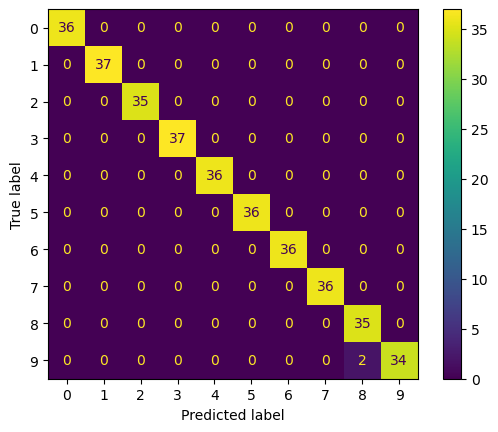

In [174]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    digits.target, 
                                                    stratify=digits.target,
                                                    test_size=0.2, 
                                                    random_state = 365,
)
grid_search.fit(X_train,y_train)
y_pred=grid_search.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [178]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.95      1.00      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



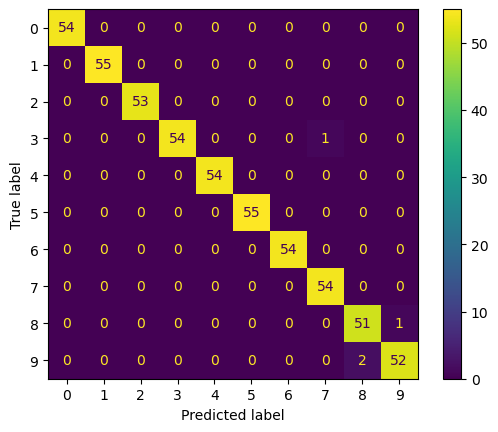

In [182]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    digits.target, 
                                                    stratify=digits.target,
                                                    test_size=0.3, 
                                                    random_state = 365,
)
grid_search.fit(X_train,y_train)
y_pred=grid_search.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [184]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.96      0.98      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

